# Corona

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data

data = pd.read_csv(r'C:\Users\Administrator\Desktop\Python Test Data\corona\covid_19_data.csv', index_col=0)

In [3]:
#dropping null values

data.dropna(axis=0)

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
4715,03/10/2020,New Mexico,US,2020-03-10T02:33:04,0.0,0.0,0.0
4716,03/10/2020,North Dakota,US,2020-03-10T02:33:04,0.0,0.0,0.0
4717,03/10/2020,South Dakota,US,2020-03-10T02:33:04,0.0,0.0,0.0


In [4]:
#renaming

data.rename(columns = {'Province/State':'Province', 'Country/Region':'Country'}, inplace= True)


In [5]:
#checking for changes

data.head(10)

,ObservationDate,Province,Country,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0


In [6]:
print(f'Shape: {data.shape}')

Shape: (4719, 7)


In [7]:
print(f'Missing values:{data.isnull().sum()}')

Missing values:ObservationDate       0
Province           1708
Country               0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64


In [8]:
#creating a copy

df = data.copy()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4719 entries, 1 to 4719
Data columns (total 7 columns):
ObservationDate    4719 non-null object
Province           3011 non-null object
Country            4719 non-null object
Last Update        4719 non-null object
Confirmed          4719 non-null float64
Deaths             4719 non-null float64
Recovered          4719 non-null float64
dtypes: float64(3), object(4)
memory usage: 294.9+ KB


In [10]:
from collections import Counter

Counter(df['Province'].values).most_common(5)

[(nan, 1708),
 ('Anhui', 49),
 ('Beijing', 49),
 ('Chongqing', 49),
 ('Fujian', 49)]

In [11]:
df.dropna(inplace = True)

In [21]:
df = df[df['Province'].isin(['Anhui', 'Beijing', 'Chongqing'])]

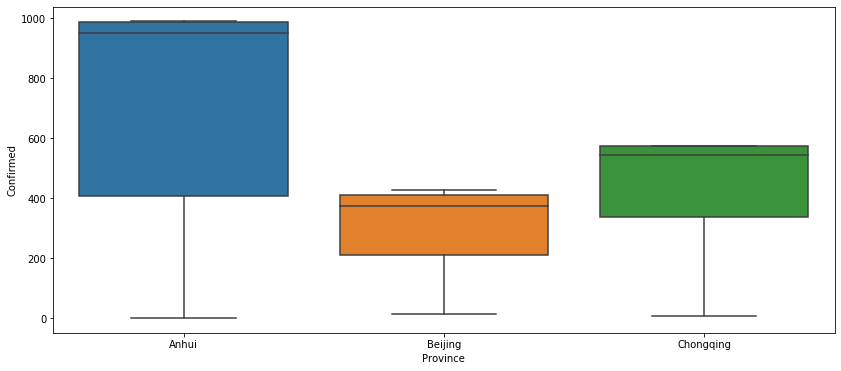

In [22]:
#revealing stats

plt.figure(figsize= [14,6])
sns.boxplot( x = df['Province'], y = df['Confirmed'])
plt.show()

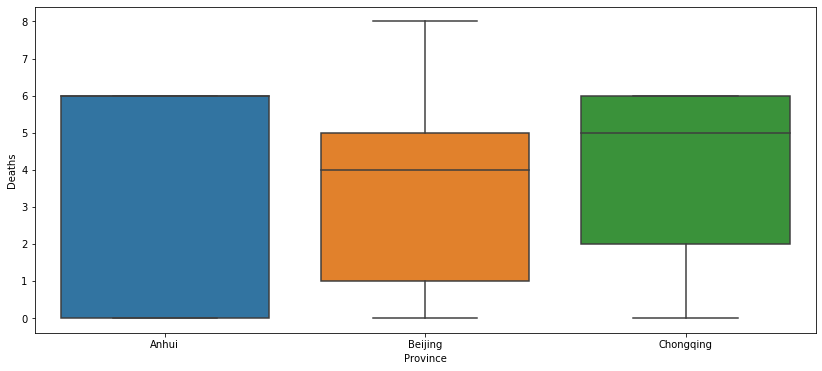

In [29]:

plt.figure(figsize= [14,6])
sns.boxplot( x = df['Province'], y = df['Deaths'])
plt.show()

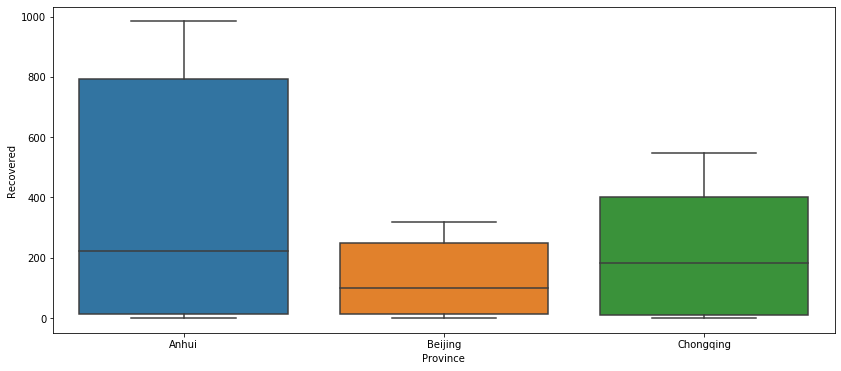

In [30]:

plt.figure(figsize= [14,6])
sns.boxplot( x = df['Province'], y = df['Recovered'])
plt.show()

<Figure size 1008x432 with 0 Axes>

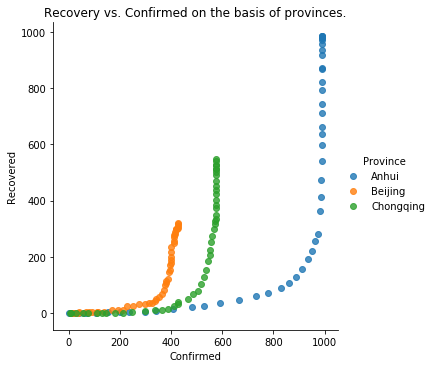

In [45]:
plt.figure(figsize=[14,6])

sns.lmplot(x = 'Confirmed', y = 'Recovered', data = df, hue = 'Province', fit_reg = False, legend = True)
plt.title('Recovery vs. Confirmed on the basis of provinces.')
plt.show()

<Figure size 1440x720 with 0 Axes>

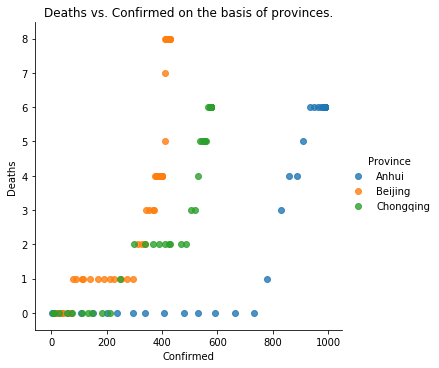

In [44]:
plt.figure(figsize=[20,10])

sns.lmplot(x = 'Confirmed', y = 'Deaths', data = df, hue = 'Province', fit_reg = False, legend = True)
plt.title('Deaths vs. Confirmed on the basis of provinces.')
plt.show()